<a href="https://colab.research.google.com/github/githubcramirez/OpenShift3-MSA/blob/master/Uso_de_Kmeans_%26_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALACIONES

In [ ]:
!pip install -q nltk wordcloud scikit-learn matplotlib

LIBRERÍAS

In [ ]:
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

CARGAR LAS RESEÑAS

In [ ]:
archivo = "reseñas.txt"  # El nombre debe coincidir con el archivo que subiste

with open(archivo, "r", encoding="utf-8") as f:
    reseñas = f.readlines()

reseñas = [r.strip() for r in reseñas if r.strip()]  # Eliminar líneas vacías

LIMPIEZA DEL TEXTO

In [ ]:
stop_words = set(stopwords.words('spanish'))

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r"[^\w\s]", "", texto)
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]
    return " ".join(palabras)

reseñas_limpias = [limpiar(r) for r in reseñas]

VECTORIZACIÓN CON TF-IDF

In [ ]:
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(reseñas_limpias)

CLUSTERING CON KMEANS

In [ ]:
k = 3  # Comida, servicio, ambiente (suponemos 3 grupos)
modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
modelo.fit(X)
etiquetas = modelo.labels_

ORGANIZAR LAS RESEÑAS POR CLUSTER

In [ ]:
clusters = {i: [] for i in range(k)}
for idx, etiqueta in enumerate(etiquetas):
    clusters[etiqueta].append(reseñas[idx])

MOSTRAR RESEÑAS DE CADA CLUSTER

In [ ]:
for cluster, textos in clusters.items():
    print(f"\n--- CLUSTER {cluster} ---")
    for r in textos:
        print("-", r)


--- CLUSTER 0 ---
- La comida estaba fría y sin sabor.
- El servicio fue extremadamente lento.
- El ambiente era muy ruidoso e incómodo.
- La carne estaba dura y mal cocida.
- Tardaron más de una hora en traer el plato.
- Las porciones eran pequeñas por el precio.
- El baño estaba sucio y olía mal.
- La experiencia general fue decepcionante.
- Pedimos una botella de vino y nos trajeron otra.
- La atención al cliente fue pésima.
- El menú era confuso y limitado.
- Nos cobraron de más en la cuenta.
- La sopa estaba aguada y sin sazón.
- El postre parecía recalentado.
- El aire acondicionado no funcionaba.
- El lugar estaba lleno de moscas.

--- CLUSTER 1 ---
- No recomendaría este restaurante a nadie.
- El restaurante estaba sobrevalorado.
- Nunca volveré a este restaurante.

--- CLUSTER 2 ---
- El mesero olvidó nuestra orden.


NUBES DE PALABRAS POR CLUSTER


*** NUBE DE PALABRAS - CLUSTER 0 ***


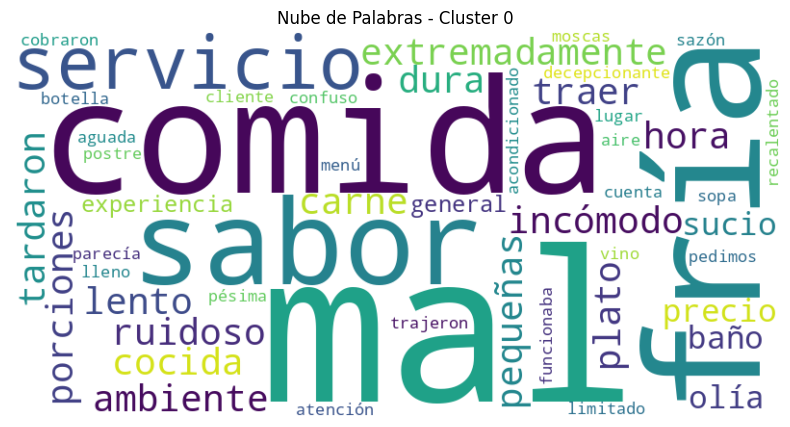


*** NUBE DE PALABRAS - CLUSTER 1 ***


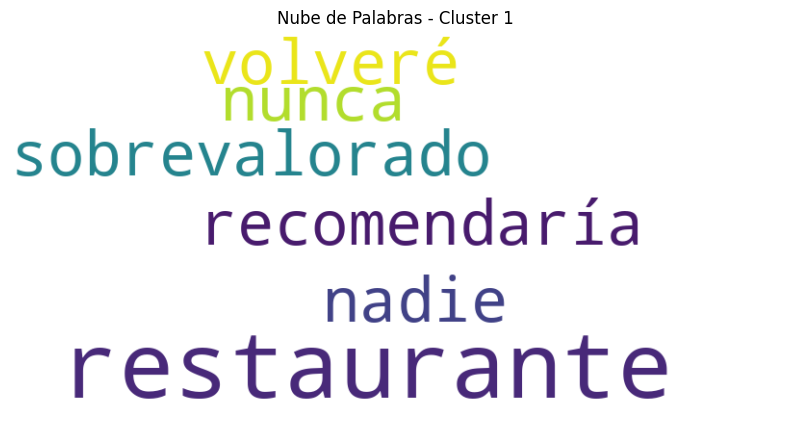


*** NUBE DE PALABRAS - CLUSTER 2 ***


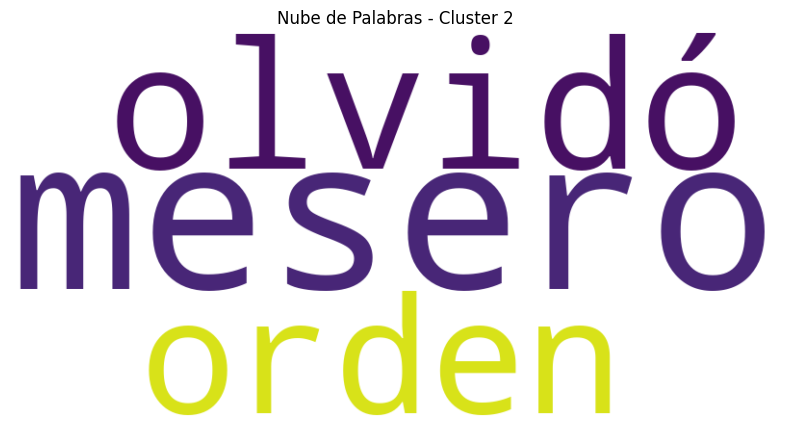

In [ ]:
for cluster, textos in clusters.items():
    print(f"\n*** NUBE DE PALABRAS - CLUSTER {cluster} ***")
    texto_cluster = " ".join(textos)
    texto_cluster = limpiar(texto_cluster)
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto_cluster)

    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de Palabras - Cluster {cluster}")
    plt.show()